# Programming for Data Analytics Final Project: Wind

### Author: Aoife Flavin

Put a description of what the project is for here



Description of the dataset

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt


I began by loading in the dataset and taking a look at the first few rows of data.

In [ ]:
df = pd.read_csv('sherkin_island_weather.csv', skiprows=17)
df.head()

C:\Users\aoife.000\AppData\Local\Temp\ipykernel_4292\2667974664.py:1: DtypeWarning: Columns (2,4,6,7,8,9,10,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sherkin_island_weather.csv', skiprows=17)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,30-apr-2004 01:00,-1,,4,,4,,,,,,7,,7,
1,30-apr-2004 02:00,-1,,4,,4,,,,,,7,,7,
2,30-apr-2004 03:00,-1,,4,,4,,,,,,7,,7,
3,30-apr-2004 04:00,-1,,4,,4,,,,,,7,,7,
4,30-apr-2004 05:00,-1,,4,,4,,,,,,7,,7,


I then renamed the columns

In [6]:
df.columns = [
    "Date and Time (UTC)", "Indicator 1", "Precipitation Amount (mm)", "Indicator 2",
    "Air Temperature (C)", "Indicator 3", "Wet Bulb Temperature (C)", 
    "Dew Point Temperature (C)", "Vapour Pressure (hPa)", 
    "Relative Humidity (%)", "Mean Sea Level Pressure (hPa)", 
    "Indicator 4", "Mean Wind Speed (knot)", "Indicator 5", 
    "Predominant Wind Direction (degree)"
]
df.head()

,Date and Time (UTC),Indicator 1,Precipitation Amount (mm),Indicator 2,Air Temperature (C),Indicator 3,Wet Bulb Temperature (C),Dew Point Temperature (C),Vapour Pressure (hPa),Relative Humidity (%),Mean Sea Level Pressure (hPa),Indicator 4,Mean Wind Speed (knot),Indicator 5,Predominant Wind Direction (degree)
0,30-apr-2004 01:00,-1,,4,,4,,,,,,7,,7,
1,30-apr-2004 02:00,-1,,4,,4,,,,,,7,,7,
2,30-apr-2004 03:00,-1,,4,,4,,,,,,7,,7,
3,30-apr-2004 04:00,-1,,4,,4,,,,,,7,,7,
4,30-apr-2004 05:00,-1,,4,,4,,,,,,7,,7,


Clean the data

In [9]:
# Drop columns with all null values
df.dropna(axis=1, how='all', inplace=True)

# Drop rows with any null values
df.dropna(axis=0, inplace=True)

# Convert the "Date and Time (UTC)" column to datetime format
df["Date and Time (UTC)"] = pd.to_datetime(df["Date and Time (UTC)"])

# Display cleaned data
print(df.head())

C:\Users\aoife.000\AppData\Local\Temp\ipykernel_4292\140876282.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date and Time (UTC)"] = pd.to_datetime(df["Date and Time (UTC)"])


   Date and Time (UTC)  Indicator 1 Precipitation Amount (mm)  Indicator 2  \
24 2004-05-01 01:00:00            0                       0.0            0   
25 2004-05-01 02:00:00            0                       0.0            0   
26 2004-05-01 03:00:00            0                       0.0            0   
27 2004-05-01 04:00:00            0                       0.0            0   
28 2004-05-01 05:00:00            0                       0.0            0   

   Air Temperature (C)  Indicator 3 Wet Bulb Temperature (C)  \
24                10.8            0                      9.1   
25                11.1            0                      9.1   
26                10.6            0                      8.9   
27                10.3            0                      8.7   
28                10.3            0                      8.7   

   Dew Point Temperature (C) Vapour Pressure (hPa) Relative Humidity (%)  \
24                       7.2                  10.1                    

Plots I could do:
- Summary Statistics: Compute mean, median, variance, and standard deviation for each weather variable (e.g., temperature, humidity, wind speed).
- Seasonal Patterns: Plot time series to observe daily or seasonal trends.
- Windspeed over a single day / week / year
- Max windspeed over time
- Heatwaves/Cold Spells: Detect extended periods of high or low temperatures.
- Storm Events: Identify periods with unusually high wind speeds or rainfall
- Heatmaps: Use heatmaps for hourly or daily patterns (e.g., temperature across the hours of the day over a month).
- Variable Interdependence: Explore how variables like temperature, humidity, and wind speed correlate.
- Trend Analysis: Identify long-term trends in temperature, precipitation, or wind speed over the period of data collection.
- Machine Learning Models: Use regression or classification models to predict specific outcomes, like rainfall.

In [17]:
#Find out what data types each variable is
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 180076 entries, 24 to 180479
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Date and Time (UTC)                  180076 non-null  datetime64[ns]
 1   Indicator 1                          180076 non-null  int64         
 2   Precipitation Amount (mm)            180076 non-null  object        
 3   Indicator 2                          180076 non-null  int64         
 4   Air Temperature (C)                  180076 non-null  float64       
 5   Indicator 3                          180076 non-null  int64         
 6   Wet Bulb Temperature (C)             180076 non-null  object        
 7   Dew Point Temperature (C)            180076 non-null  object        
 8   Vapour Pressure (hPa)                180076 non-null  object        
 9   Relative Humidity (%)                180018 non-null  float64       
 10  

In [13]:
df["Air Temperature (C)"] = pd.to_numeric(df["Air Temperature (C)"], errors="coerce")
df["Relative Humidity (%)"] = pd.to_numeric(df["Relative Humidity (%)"], errors="coerce")
df["Mean Wind Speed (knot)"] = pd.to_numeric(df["Mean Wind Speed (knot)"], errors="coerce")

In [ ]:
# Filter data for winter (Nov-Jan) and summer (May-Jul)
winter_months = [11, 12, 1]
summer_months = [5, 6, 7]

# Just the month
df["Month"] = df["Date and Time (UTC)"].dt.month

# filter winter and summer data
winter_data = df[df["Month"].isin(winter_months)]
summer_data = df[df["Month"].isin(summer_months)]

# create function for summary stats
def compute_summary_statistics(data, variable_name):
    stats = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Variance": np.var(data),
        "Standard Deviation": np.std(data)
    }
    return stats

# calculate winter stats
winter_stats = {
    "Temperature (C)": compute_summary_statistics(winter_data["Air Temperature (C)"], "Temperature"),
    "Humidity (%)": compute_summary_statistics(winter_data["Relative Humidity (%)"], "Humidity"),
    "Wind Speed (knot)": compute_summary_statistics(winter_data["Mean Wind Speed (knot)"], "Wind Speed"),
}

# calculate summer stats
summer_stats = {
    "Temperature (C)": compute_summary_statistics(summer_data["Air Temperature (C)"], "Temperature"),
    "Humidity (%)": compute_summary_statistics(summer_data["Relative Humidity (%)"], "Humidity"),
    "Wind Speed (knot)": compute_summary_statistics(summer_data["Mean Wind Speed (knot)"], "Wind Speed"),
}

# Display results
print("Winter Summary Statistics:")
for variable, stats in winter_stats.items():
    print(f"{variable}: {stats}")

print("\nSummer Summary Statistics:")
for variable, stats in summer_stats.items():
    print(f"{variable}: {stats}")

Winter Summary Statistics:
Temperature (C): {'Mean': 8.820667158209888, 'Median': 9.4, 'Variance': 7.786935292326204, 'Standard Deviation': 2.7905080706434453}
Humidity (%): {'Mean': 83.73214765100671, 'Median': nan, 'Variance': 109.27646540995941, 'Standard Deviation': 10.453538415769055}
Wind Speed (knot): {'Mean': 14.490671850213374, 'Median': 14.0, 'Variance': 59.11297351246378, 'Standard Deviation': 7.68849618016838}

Summer Summary Statistics:
Temperature (C): {'Mean': 13.525720976625179, 'Median': 13.5, 'Variance': 6.621792137072866, 'Standard Deviation': 2.5732843094133355}
Humidity (%): {'Mean': 84.55136822932478, 'Median': 86.0, 'Variance': 111.12740814140811, 'Standard Deviation': 10.541698541573275}
Wind Speed (knot): {'Mean': 10.61000043367015, 'Median': 10.0, 'Variance': 28.613067951776912, 'Standard Deviation': 5.349118427533355}


Sources:
1. https://www.geeksforgeeks.org/get-month-from-date-in-pandas-python/
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
3. https://www.geeksforgeeks.org/compute-the-mean-standard-deviation-and-variance-of-a-given-numpy-array/


Checked what is the most up to date data in the dataset: This data ends at the end of November 2024

In [18]:
print(df.tail(10))

       Date and Time (UTC)  Indicator 1 Precipitation Amount (mm)  \
180470 2024-11-30 15:00:00            0                       0.5   
180471 2024-11-30 16:00:00            0                       0.3   
180472 2024-11-30 17:00:00            0                       0.8   
180473 2024-11-30 18:00:00            0                       0.2   
180474 2024-11-30 19:00:00            0                       0.0   
180475 2024-11-30 20:00:00            0                       0.0   
180476 2024-11-30 21:00:00            0                       0.0   
180477 2024-11-30 22:00:00            0                       0.0   
180478 2024-11-30 23:00:00            0                       0.0   
180479 2024-12-01 00:00:00            0                       0.0   

        Indicator 2  Air Temperature (C)  Indicator 3  \
180470            0                 13.7            0   
180471            0                 13.7            0   
180472            0                 13.5            0   
180473      

Create a plot of windspeed over a single day. (I chose the 19th of November because that is my birthday)

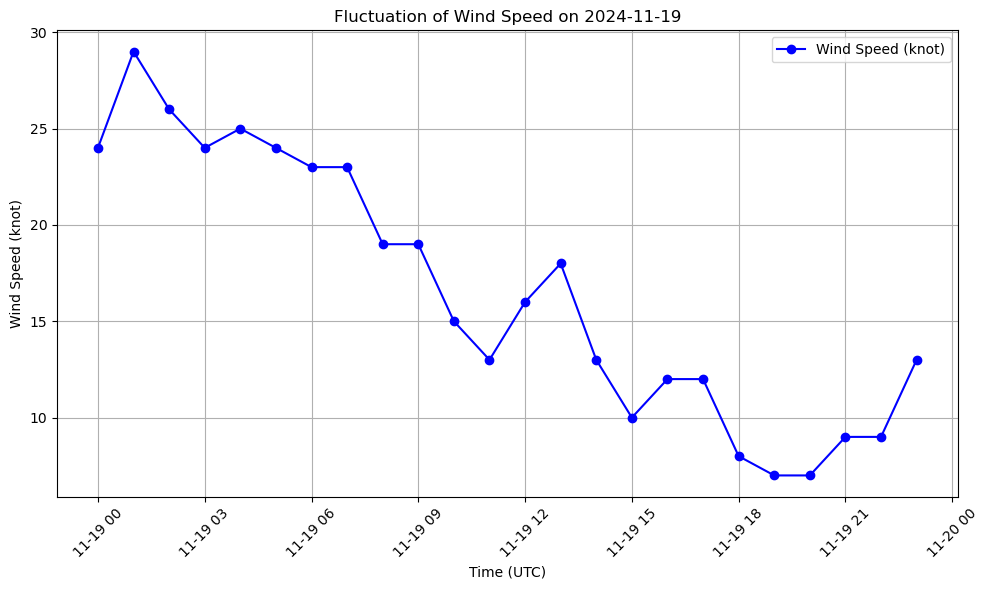

In [19]:
# Filter data for the specific date (19th November 2024)
specific_date = "2024-11-19"
filtered_data = df[df["Date and Time (UTC)"].dt.date == pd.to_datetime(specific_date).date()]

# Plot Wind Speed over time
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["Date and Time (UTC)"], filtered_data["Mean Wind Speed (knot)"], marker='o', color='blue', label="Wind Speed (knot)")
plt.xlabel("Time (UTC)")
plt.ylabel("Wind Speed (knot)")
plt.title(f"Fluctuation of Wind Speed on {specific_date}")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

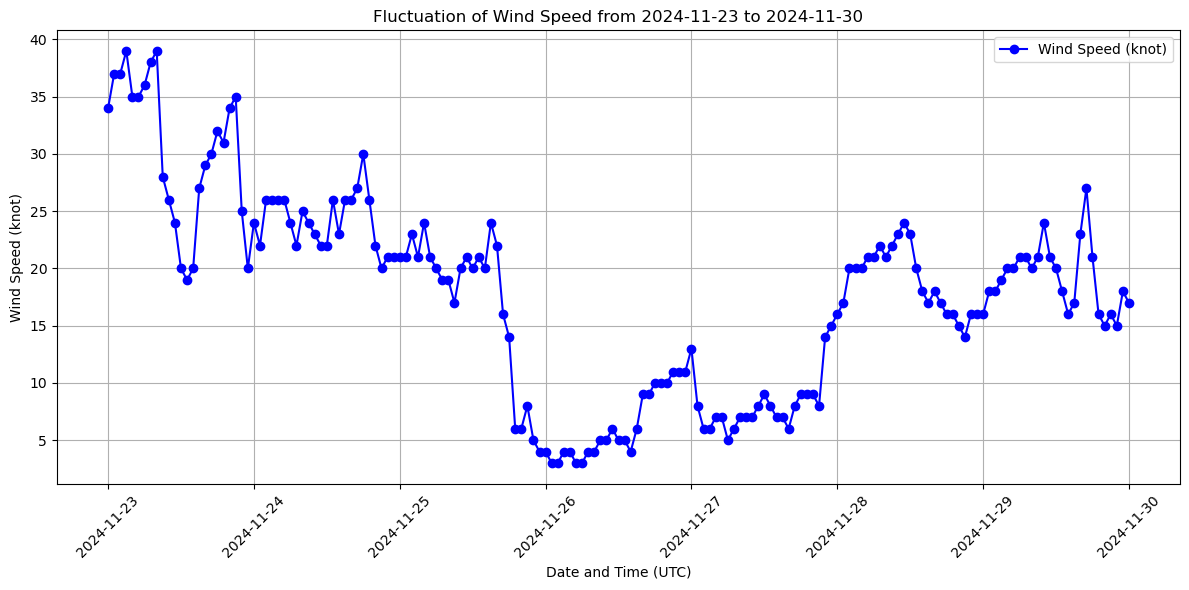

In [ ]:
# date range
start_date = "2024-11-23"
end_date = "2024-11-30"

# Filter data
filtered_data = df[(df["Date and Time (UTC)"] >= pd.to_datetime(start_date)) & 
                   (df["Date and Time (UTC)"] <= pd.to_datetime(end_date))]

# Plot Wind Speed over week
plt.figure(figsize=(12, 6))
plt.plot(filtered_data["Date and Time (UTC)"], filtered_data["Mean Wind Speed (knot)"], marker='o', color='blue', label="Wind Speed (knot)")
plt.xlabel("Date and Time (UTC)")
plt.ylabel("Wind Speed (knot)")
plt.title(f"Fluctuation of Wind Speed from {start_date} to {end_date}")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
